In [49]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

sec.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-05-04  53000.0  53900.0  51800.0  51900.0  50660.105469  39565391
2018-05-08  52600.0  53200.0  51900.0  52600.0  51343.382812  23104720
2018-05-09  52600.0  52800.0  50900.0  50900.0  49683.992188  16128305
2018-05-10  51700.0  51700.0  50600.0  51600.0  50367.269531  13905263
2018-05-11  52000.0  52200.0  51200.0  51300.0  50074.437500  10314997
2018-05-14  51000.0  51100.0  49900.0  50100.0  48903.105469  14909272
2018-05-15  50200.0  50400.0  49100.0  49200.0  48024.605469  18709146
2018-05-16  49200.0  50200.0  49150.0  49850.0  48659.078125  15918683
2018-05-17  50300.0  50500.0  49400.0  49400.0  48219.828125  10365440
2018-05-18  49900.0  49900.0  49350.0  49500.0  48317.437500   6706570

In [50]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

Open        High         Low       Close   Adj Close
Date                                                                  
2020-08-18  210.529999  212.360001  209.210007  211.490005  210.979996
2020-08-19  211.490005  212.100006  209.250000  209.699997  209.699997
2020-08-20  209.539993  215.000000  208.910004  214.580002  214.580002
2020-08-21  213.860001  216.250000  212.850006  213.020004  213.020004
2020-08-24  214.789993  215.520004  212.429993  213.690002  213.690002

In [51]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-24', '2020-08-25'],
              dtype='datetime64[ns]', name='Date', length=566, freq=None)

In [52]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

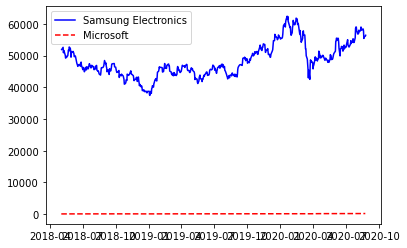

In [53]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

In [54]:
type(sec['Close'])

pandas.core.series.Series

In [55]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-08-19    57800.0
2020-08-20    55400.0
2020-08-21    55900.0
2020-08-24    56100.0
2020-08-25    56400.0
Name: Close, Length: 566, dtype: float64

In [56]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2020-08-19    58400.0
2020-08-20    57800.0
2020-08-21    55400.0
2020-08-24    55900.0
2020-08-25    56100.0
Name: Close, Length: 566, dtype: float64

In [57]:
sec['Close'].shift(-1)

Date
2018-05-04    52600.0
2018-05-08    50900.0
2018-05-09    51600.0
2018-05-10    51300.0
2018-05-11    50100.0
               ...   
2020-08-19    55400.0
2020-08-20    55900.0
2020-08-21    56100.0
2020-08-24    56400.0
2020-08-25        NaN
Name: Close, Length: 566, dtype: float64

In [58]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [59]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

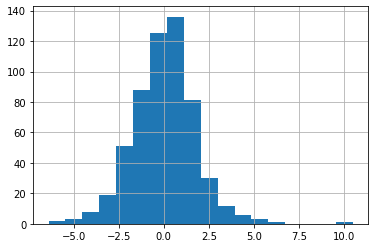

In [60]:
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [61]:
sec_dpc.describe()

count    566.000000
mean       0.030144
std        1.762228
min       -6.387665
25%       -1.009179
50%        0.104056
75%        1.031284
max       10.470588
Name: Close, dtype: float64

In [62]:
sec_dpc_cs = sec_dpc.cumsum() #일간 변동률의 누적합을 구함
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-08-19    19.418525
2020-08-20    15.266276
2020-08-21    16.168803
2020-08-24    16.526585
2020-08-25    17.061344
Name: Close, Length: 566, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


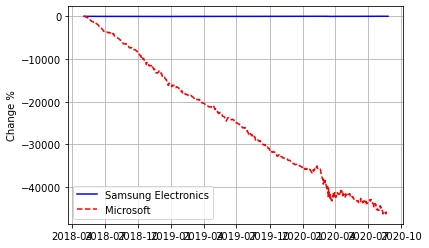

In [63]:
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0 #일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.and
sec_dpc_cs = sec_dpc.cumsum() # 일간 변동률의 누적합을 구한다.

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close'] - msft['Close'].shift(1) -1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


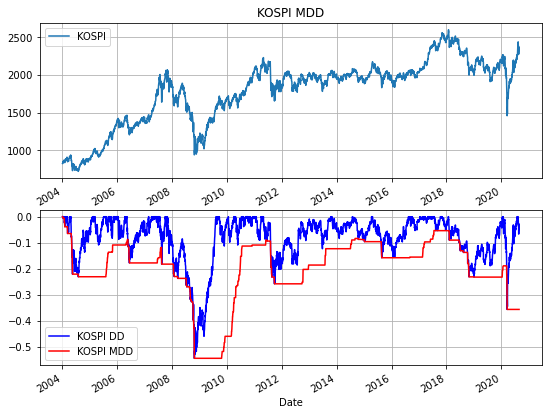

In [65]:
yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close'] / peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()


In [66]:
max_dd.min()

-0.5453665130144085

In [68]:
max_dd[max_dd==-0.5453664915127007]

Series([], Name: Adj Close, dtype: float64)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


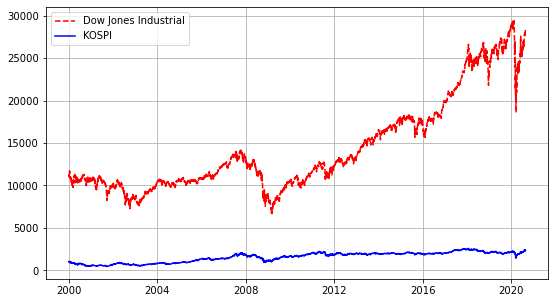

In [69]:
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100
